In [61]:
#@title Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [62]:
#@title Step 2: Load the Dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [63]:
#@title Step 3: Preprocess the Data

data = data.drop(["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)

# Encode categorical features
encoder = LabelEncoder()
data['Type'] = encoder.fit_transform(data['Type'])

# Separate features and target variable
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Handle missing values
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [64]:
#@title Step 4: Define Function to Train and Evaluate the Model with max_iter parameter
def evaluate_model(test_size, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LogisticRegression(max_iter=max_iter, solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    precision = class_report['1']['precision']
    recall = class_report['1']['recall']
    f1_score = class_report['1']['f1-score']

    return accuracy, precision, recall, f1_score


In [69]:
#@title Step 5: Evaluate the Model for Different Test Sizes

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
max_iter = 1000

results = []

for test_size in test_sizes:
    accuracy, precision, recall, f1_score = evaluate_model(test_size=test_size, max_iter=max_iter)
    results.append((test_size, accuracy, precision, recall, f1_score))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df


,Test Size,Accuracy,Precision,Recall,F1-Score
0,0.1,0.96800,0.428571,0.096774,0.157895
1,0.2,0.97300,0.640000,0.262295,0.372093
2,0.3,0.97400,0.727273,0.258065,0.380952
3,0.4,0.97325,0.775000,0.240310,0.366864
4,0.5,0.97260,0.782609,0.220859,0.344498


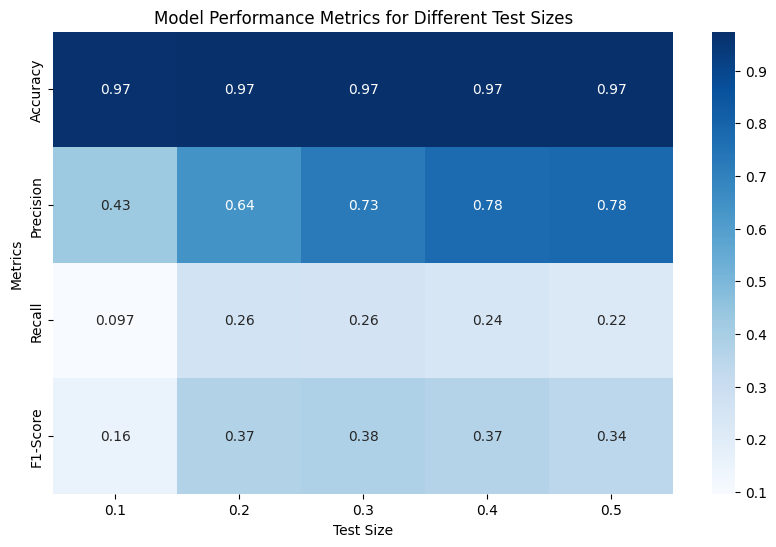

In [70]:
#@title Step 6: Create Heatmap for Each Metric

plt.figure(figsize=(10, 6))

# Create heatmap for all metrics
sns.heatmap(results_df.set_index('Test Size').T, annot=True, cmap='Blues', cbar=True)

plt.title('Model Performance Metrics for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Metrics')

plt.show()


In [81]:
#@title Step 7: Evaluate the Model for Different max_iter Values

max_iters = [50, 100, 150, 200, 250, 1000]
results_max_iter = []

for max_iter in max_iters:
    accuracy, precision, recall, f1_score = evaluate_model(test_size=0.3, max_iter=max_iter)
    results_max_iter.append((max_iter, accuracy, precision, recall, f1_score))

# Convert results to DataFrame
results_max_iter_df = pd.DataFrame(results_max_iter, columns=['max_iter', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_max_iter_df


,max_iter,Accuracy,Precision,Recall,F1-Score
0,50,0.974,0.727273,0.258065,0.380952
1,100,0.974,0.727273,0.258065,0.380952
2,150,0.974,0.727273,0.258065,0.380952
3,200,0.974,0.727273,0.258065,0.380952
4,250,0.974,0.727273,0.258065,0.380952
5,1000,0.974,0.727273,0.258065,0.380952


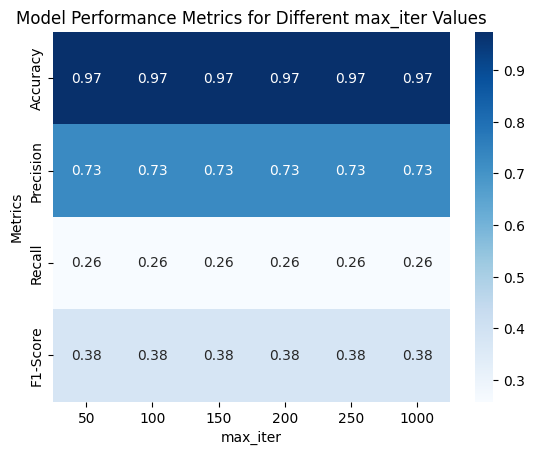

In [82]:
# Create heatmap for all metrics and max_iter
sns.heatmap(results_max_iter_df.set_index('max_iter').T, annot=True, cmap='Blues', cbar=True)

plt.title('Model Performance Metrics for Different max_iter Values')
plt.xlabel('max_iter')
plt.ylabel('Metrics')

plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.73      0.26      0.38        93

    accuracy                           0.97      3000
   macro avg       0.85      0.63      0.68      3000
weighted avg       0.97      0.97      0.97      3000



<Figure size 800x600 with 0 Axes>

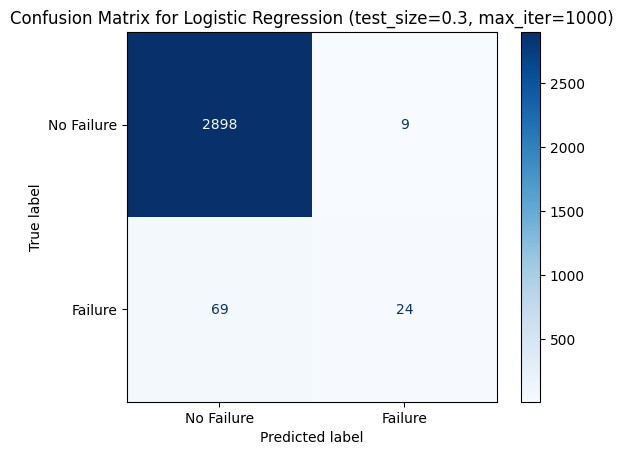

In [86]:
#@title Step 8: Display Classification Report and Confusion Matrix for test_size = 0.3 and max_iter = 1000

# Split data with test_size = 0.3 and max_iter = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Failure', 'Failure'])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression (test_size=0.3, max_iter=1000)')
plt.show()